In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import warnings

In [98]:
warnings.filterwarnings('ignore')

In [99]:
cong_data = pd.read_csv('Candidate_District_History.csv')
cong_data

,Candidate,D_Party,R_Party,L_Party,Candidate Age,Maricopa_D,Maricopa_R,Maricopa_L,Pima_D,Pima_R,...,18+ Population,Vote_Pct,Turnout_pct,Election,President,Year,Status,District,Incumbent,Opp_Candidate
0,Raul Grijalva,Democratic,NaN,NaN,76,"5,893",5360,NIL,"41,025","16,572",...,"440,000",59.0,23.60,General,George W. Bush,2002,Won,7,No,Ross Hieb
1,Raul Grijalva,Democratic,NaN,NaN,76,12024,11574,NIL,"29,715","36,041",...,"450,000",62.1,38.99,General,George W. Bush,2004,Won,7,Yes,Joseph Sweeney
2,Raul Grijalva,Democratic,NaN,NaN,76,8626,8637,NIL,"49,850","17,921",...,"470,000",61.1,27.98,General,George W. Bush,2006,Won,7,Yes,Ron Drake
3,Raul Grijalva,Democratic,NaN,NaN,76,18503,12468,NIL,"68,181","22,078",...,"476,000",63.3,41.28,General,George W. Bush,2008,Won,7,Yes,Joseph Sweeney
4,Raul Grijalva,Democratic,NaN,NaN,76,11812,10167,NIL,"15,672",NIL,...,"497,000",50.2,32.02,General,Barack Obama,2010,Won,7,Yes,Ruth McClung
5,Ed Pastor,Democratic,NaN,NaN,75,"14,489","23,338",NIL,"104,489",NIL,...,"511,000",81.7,25.02,General,Barack Obama,2012,Won,7,Yes,Joe Cobb
6,Raul Grijalva,Democratic,NaN,NaN,76,NIL,NIL,NIL,NIL,NIL,...,"514,000",58.4,32.82,General,Barack Obama,2012,Won,3,Yes,Gabriela Saucedo Mercer
7,Raul Grijalva,Democratic,NaN,NaN,76,NIL,NIL,NIL,NIL,NIL,...,"519,000",55.7,20.12,General,Barack Obama,2014,Won,3,Yes,Gabriela Saucedo Mercer
8,Ruben Gallago,Democratic,NaN,NaN,44,"54,235","10,715",NIL,"54,235",NIL,...,"518,000",74.9,13.99,General,Barack Obama,2014,Won,7,No,Joe Cobb
9,Raul Grijalva,Democratic,NaN,NaN,76,NIL,NIL,NIL,NIL,NIL,...,"520,000",98.6,29.05,General,Barack Obama,2016,Won,3,Yes,Eve Nunez


In [100]:
cong_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Candidate       31 non-null     object 
 1   D_Party         20 non-null     object 
 2   R_Party         11 non-null     object 
 3   L_Party         0 non-null      float64
 4   Candidate Age   31 non-null     int64  
 5   Maricopa_D      31 non-null     object 
 6   Maricopa_R      31 non-null     object 
 7   Maricopa_L      31 non-null     object 
 8   Pima_D          31 non-null     object 
 9   Pima_R          31 non-null     object 
 10  Pima_L          31 non-null     object 
 11  Yuma_D          31 non-null     object 
 12  Yuma_R          31 non-null     object 
 13  Yuma_L          30 non-null     object 
 14  Votes           31 non-null     object 
 15  Total_votes     31 non-null     object 
 16  18+ Population  31 non-null     object 
 17  Vote_Pct        31 non-null     float

In [101]:
cong_data.replace('NIL', np.nan, inplace=True)
cong_data.fillna(0, inplace=True)

In [102]:
cong_data['Votes'] = cong_data['Votes'].replace({',': ''}, regex=True).astype(int)
cong_data['Total_votes'] = cong_data['Total_votes'].replace({',': ''}, regex=True).astype(int)
cong_data['18+ Population'] = cong_data['18+ Population'].replace({',': ''}, regex=True).astype(int)

cong_data['Maricopa_D'] = cong_data['Maricopa_D'].replace({',': ''}, regex=True)
cong_data['Maricopa_D'] = pd.to_numeric(cong_data['Maricopa_D'], errors='coerce')
cong_data['Maricopa_D'] = cong_data['Maricopa_D'].astype('Int64')

cong_data['Maricopa_R'] = cong_data['Maricopa_R'].replace({',': ''}, regex=True)
cong_data['Maricopa_R'] = pd.to_numeric(cong_data['Maricopa_R'], errors='coerce')
cong_data['Maricopa_R'] = cong_data['Maricopa_R'].astype('Int64')

cong_data['Maricopa_L'] = cong_data['Maricopa_L'].replace({',': ''}, regex=True)
cong_data['Maricopa_L'] = pd.to_numeric(cong_data['Maricopa_L'], errors='coerce')
cong_data['Maricopa_L'] = cong_data['Maricopa_L'].astype('Int64')

cong_data['Pima_D'] = cong_data['Pima_D'].replace({',': ''}, regex=True)
cong_data['Pima_D'] = pd.to_numeric(cong_data['Pima_D'], errors='coerce')
cong_data['Pima_D'] = cong_data['Pima_D'].astype('Int64')

cong_data['Pima_R'] = cong_data['Pima_R'].replace({',': ''}, regex=True)
cong_data['Pima_R'] = pd.to_numeric(cong_data['Pima_R'], errors='coerce')
cong_data['Pima_R'] = cong_data['Pima_R'].astype('Int64')

cong_data['Pima_L'] = cong_data['Pima_L'].replace({',': ''}, regex=True)
cong_data['Pima_L'] = pd.to_numeric(cong_data['Pima_L'], errors='coerce')
cong_data['Pima_L'] = cong_data['Pima_L'].astype('Int64')

cong_data['Yuma_D'] = cong_data['Yuma_D'].replace({',': ''}, regex=True)
cong_data['Yuma_D'] = pd.to_numeric(cong_data['Yuma_D'], errors='coerce')
cong_data['Yuma_D'] = cong_data['Yuma_D'].astype('Int64')

cong_data['Yuma_R'] = cong_data['Yuma_R'].replace({',': ''}, regex=True)
cong_data['Yuma_R'] = pd.to_numeric(cong_data['Yuma_R'], errors='coerce')
cong_data['Yuma_R'] = cong_data['Yuma_R'].astype('Int64')

cong_data['Yuma_L'] = cong_data['Yuma_L'].replace({',': ''}, regex=True)
cong_data['Yuma_L'] = pd.to_numeric(cong_data['Yuma_L'], errors='coerce')
cong_data['Yuma_L'] = cong_data['Yuma_L'].astype('Int64')

In [103]:
cong_data.isnull().sum()

Candidate         0
D_Party           0
R_Party           0
L_Party           0
Candidate Age     0
Maricopa_D        0
Maricopa_R        0
Maricopa_L        0
Pima_D            0
Pima_R            0
Pima_L            0
Yuma_D            0
Yuma_R            0
Yuma_L            0
Votes             0
Total_votes       0
18+ Population    0
Vote_Pct          0
Turnout_pct       0
Election          0
President         0
Year              0
Status            0
District          0
Incumbent         0
Opp_Candidate     0
dtype: int64

In [104]:
cong_data

,Candidate,D_Party,R_Party,L_Party,Candidate Age,Maricopa_D,Maricopa_R,Maricopa_L,Pima_D,Pima_R,...,18+ Population,Vote_Pct,Turnout_pct,Election,President,Year,Status,District,Incumbent,Opp_Candidate
0,Raul Grijalva,Democratic,0,0.0,76,5893,5360,0,41025,16572,...,440000,59.0,23.60,General,George W. Bush,2002,Won,7,No,Ross Hieb
1,Raul Grijalva,Democratic,0,0.0,76,12024,11574,0,29715,36041,...,450000,62.1,38.99,General,George W. Bush,2004,Won,7,Yes,Joseph Sweeney
2,Raul Grijalva,Democratic,0,0.0,76,8626,8637,0,49850,17921,...,470000,61.1,27.98,General,George W. Bush,2006,Won,7,Yes,Ron Drake
3,Raul Grijalva,Democratic,0,0.0,76,18503,12468,0,68181,22078,...,476000,63.3,41.28,General,George W. Bush,2008,Won,7,Yes,Joseph Sweeney
4,Raul Grijalva,Democratic,0,0.0,76,11812,10167,0,15672,0,...,497000,50.2,32.02,General,Barack Obama,2010,Won,7,Yes,Ruth McClung
5,Ed Pastor,Democratic,0,0.0,75,14489,23338,0,104489,0,...,511000,81.7,25.02,General,Barack Obama,2012,Won,7,Yes,Joe Cobb
6,Raul Grijalva,Democratic,0,0.0,76,0,0,0,0,0,...,514000,58.4,32.82,General,Barack Obama,2012,Won,3,Yes,Gabriela Saucedo Mercer
7,Raul Grijalva,Democratic,0,0.0,76,0,0,0,0,0,...,519000,55.7,20.12,General,Barack Obama,2014,Won,3,Yes,Gabriela Saucedo Mercer
8,Ruben Gallago,Democratic,0,0.0,44,54235,10715,0,54235,0,...,518000,74.9,13.99,General,Barack Obama,2014,Won,7,No,Joe Cobb
9,Raul Grijalva,Democratic,0,0.0,76,0,0,0,0,0,...,520000,98.6,29.05,General,Barack Obama,2016,Won,3,Yes,Eve Nunez


In [105]:
cong_data['Vote_share'] = cong_data['Votes'] / cong_data['Total_votes']

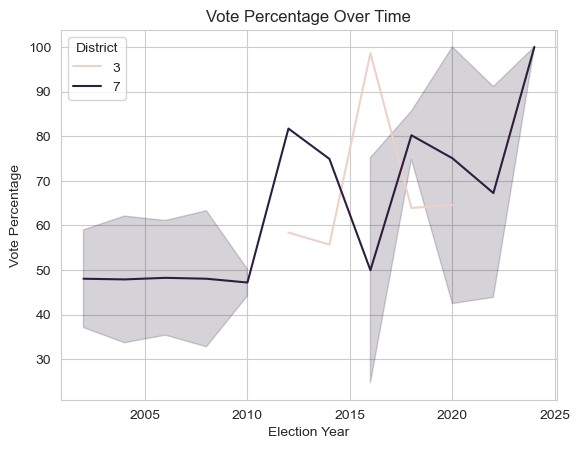

In [106]:
# Vote Percentage over time in AZ7
sns.lineplot(data=cong_data, x='Year', y='Vote_Pct', hue='District')
plt.title('Vote Percentage Over Time')
plt.xlabel('Election Year')
plt.ylabel('Vote Percentage')
plt.show()

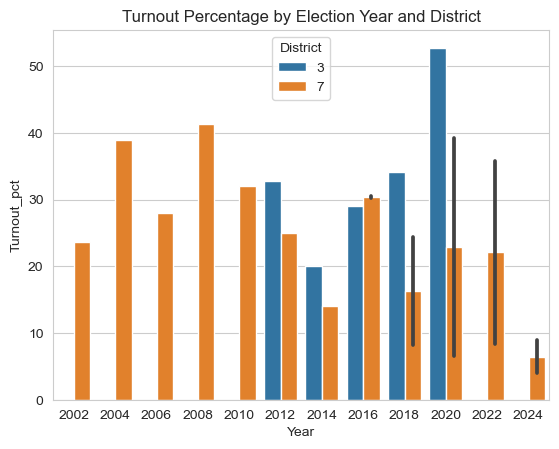

In [107]:
# Turnout Percentage by Election Year and District
sns.barplot(data=cong_data, x='Year', y='Turnout_pct', hue='District')
plt.title('Turnout Percentage by Election Year and District')
plt.show()

In [108]:
label_encoder = LabelEncoder()
candidate_encoder = LabelEncoder()

In [109]:
cong_data['Candidate'] = candidate_encoder.fit_transform(cong_data['Candidate'])

In [110]:
categorical_cols = ['Incumbent', 'Status', 'District', 'Election']
for col in categorical_cols:
    cong_data[col] = label_encoder.fit_transform(cong_data[col].astype(str))

In [111]:
X = cong_data.drop(columns=['Candidate'])
y = cong_data['Candidate']

X['D_party_encoded'] = X['D_Party'].apply(lambda x: 1 if x == 'Democratic' else 0)
X['R_party_encoded'] = X['R_Party'].apply(lambda x: 1 if x == 'Republic' else 0)

X = pd.get_dummies(X, drop_first=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [112]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [114]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoosting': AdaBoostClassifier(random_state=42),
}

In [115]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[model_name] = {'Accuracy': accuracy, 'Report': report}

In [116]:
for mode_name, result in results.items():
    print(f"Model: {mode_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report: {result['Report']}")
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.5714
Classification Report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         0
           9       1.00      0.50      0.67         2

    accuracy                           0.57         7
   macro avg       0.40      0.30      0.33         7
weighted avg       0.71      0.57      0.62         7

------------------------------------------------------------
Model: SVM
Accuracy: 0.4286
Classification Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           6       0.43      1.00      0.60         3
           9       0.00      0.00      0.00         2

    accuracy                           0.43         7
   macro avg       0.14      0.33      0.20         7
weight

In [117]:
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10, 18],
    "min_samples_leaf": [1, 2, 4, 7],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=6, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy (Random Forest): {accuracy_rf:.4f}")

Fitting 6 folds for each of 1920 candidates, totalling 11520 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

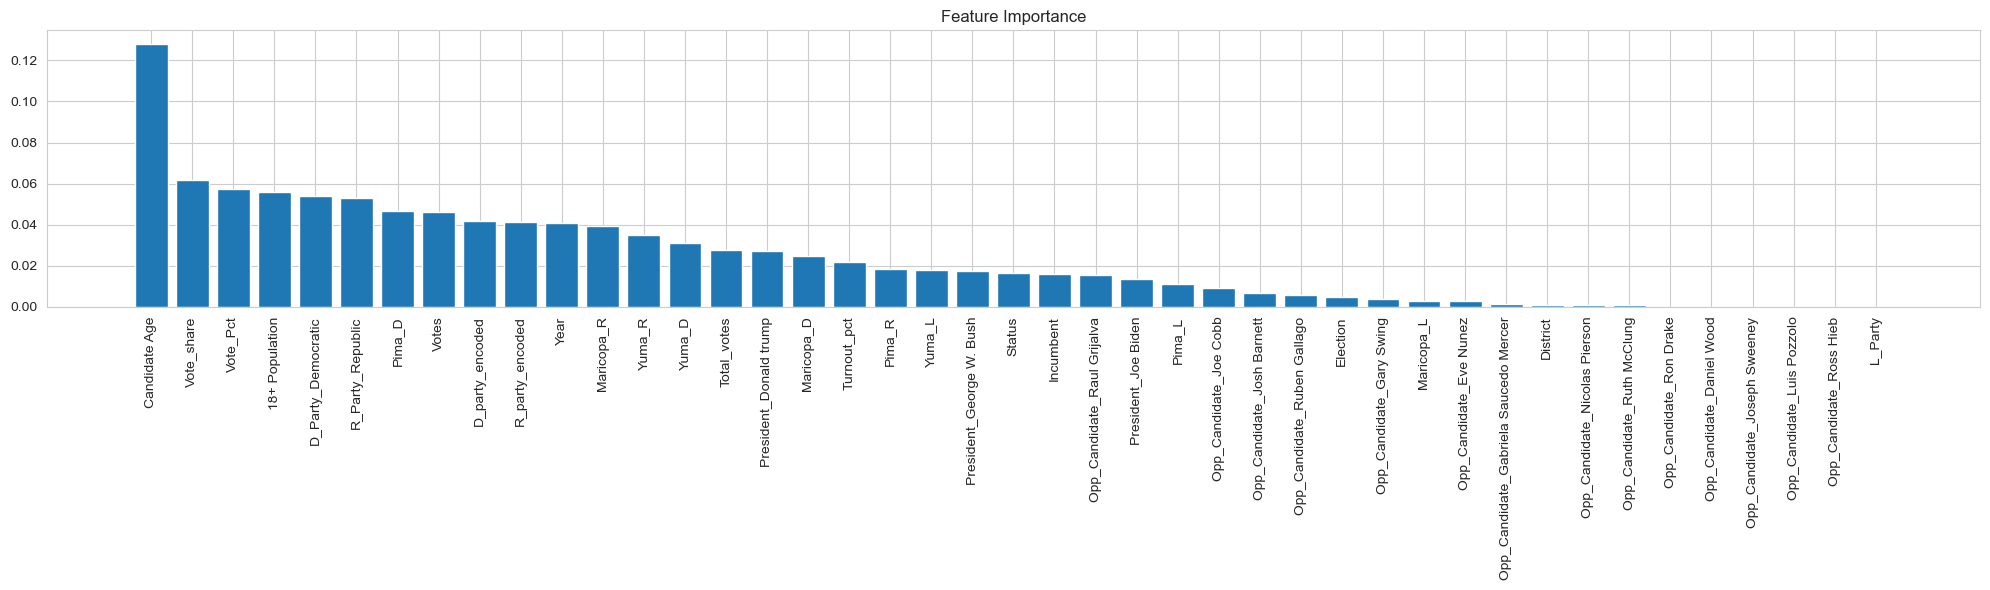

In [118]:
imp_features = best_rf.feature_importances_
indices = np.argsort(imp_features)[::-1]
features = X.columns

plt.figure(figsize=(20, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), imp_features[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [119]:
# Predict for new candidate
new_data = {
    'Candidate Age': np.nan,
    'Maricopa_D': np.nan,
    'Maricopa_R': np.nan,
    'Maricopa_L': np.nan,
    'Pima_D': np.nan,
    'Pima_R': np.nan,
    'Pima_L': np.nan,
    'Yuma_D': np.nan,
    'Yuma_R': np.nan,
    'Yuma_L': np.nan,
    'Votes': max(democratic_votes, republican_votes),  # Use the maximum vote count
    'Total_votes': np.nan,
    '18+ Population': 616992,
    'Vote_Pct': np.nan,
    'Turnout_pct': np.nan,
    'Incumbent': 1 if max(democratic_votes, republican_votes) == democratic_votes else 0,
    'Status': 'Won',
    'District': 7,
    'Election': 'General'
}

new_data_df = pd.DataFrame([new_data])
new_data_df = pd.get_dummies(new_data_df).reindex(columns=X_train.columns, fill_value=0)

new_data_imputed = pd.DataFrame(imputer.transform(new_data_df), columns=X_train.columns)
new_data_scaled = pd.DataFrame(scaler.transform(new_data_imputed), columns=X_train.columns)

predicted_candidate_label = best_rf.predict(new_data_scaled)[0]
predicted_candidate = candidate_encoder.inverse_transform([predicted_candidate_label])[0]
print(f"Predicted Candidate: {predicted_candidate}")

Predicted Candidate: Raul Grijalva


In [ ]:
# Calculate total votes
total_votes = democratic_votes + republican_votes

# Determine the winner's votes
if democratic_votes > republican_votes:
    winner_votes = democratic_votes
    winner = 'Democratic'
else:
    winner_votes = republican_votes
    winner = 'Republican'


# Calculate the vote percentage for the winner
vote_pct = (winner_votes / total_votes) * 100


# Print the result
print(f"The winner is the {winner} candidate.")
print(f"Vote Percentage for the winner: {vote_pct:.2f}%")